# Import & Setting

## Import

In [10]:
import numpy as np
import pandas as pd

# Functions

In [11]:
def generate_multicollinear_data(n_samples=1000, n_features=10):
    """
    Generate a dataset with multicollinearity and additional features.

    Parameters:
    - n_samples: The number of samples to generate.
    - n_features: The total number of features. At least 3 required.

    Returns:
    - A pandas DataFrame with n_features columns, where multicollinearity is present.
    """
    if n_features < 3:
        raise ValueError("Number of features must be at least 3.")

    np.random.seed(0)

    # Generate the first feature
    X1 = np.random.normal(0, 1, n_samples)

    # Generate dependent variables with multicollinearity
    X2 = 0.5 * X1 + np.random.normal(0, 1, n_samples)
    X3 = -0.7 * X1 + np.random.normal(0, 1, n_samples)

    # Initialize DataFrame with first three features
    df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

    # Generate additional features with some random values
    for i in range(4, n_features + 1):
        df[f'X{i}'] = np.random.normal(0, 1, n_samples)

    return df

In [42]:
def generate_target_variable(df, noise_level=0.5):
    """
    Generate a target variable for the given DataFrame.

    The target variable is created as a linear combination of some of the features in the DataFrame,
    with added noise.

    Parameters:
    - df: DataFrame with the feature variables.
    - noise_level: The standard deviation of the Gaussian noise added to the target variable.

    Returns:
    - A numpy array representing the target variable.
    """
    np.random.seed(0)

    # Create a linear combination of some features
    # Here, we arbitrarily choose coefficients for the linear combination
    coefficients = [0.3, -0.2, 0.5, 0.1, -0.1, 0.3, 0, 0.2, -0.2, 0.1]
    
    if len(df.columns) != len(coefficients):
        raise ValueError("The length of coefficients should match the number of features in the DataFrame.")

    # Calculate the target variable
    y = np.dot(df.values, coefficients) + np.random.normal(0, noise_level, df.shape[0])
    y = pd.DataFrame(y, columns=["ans"])

    return y

In [55]:
def generate_target_with_differential_importance(df, noise_level=0.5):
    """
    Generate a target variable with differential feature importance for the given DataFrame.

    The target variable is created as a nonlinear combination of all features in the DataFrame,
    with different weights to create importance differences, and added noise.

    Parameters:
    - df: DataFrame with the feature variables.
    - noise_level: The standard deviation of the Gaussian noise added to the target variable.

    Returns:
    - A numpy array representing the target variable with differential feature importance.
    """
    np.random.seed(0)

    # Number of features in the DataFrame
    n_features = df.shape[1]

    # Apply a nonlinear transformation to each feature
    transformed_features = np.sin(df) + np.log(np.abs(df) + 1)

    # Assign different weights to each feature to create importance differences
    weights = np.linspace(1, 0.1, n_features)
    weighted_features = transformed_features * weights

    # Sum up the weighted features and add noise to create the target variable
    y = np.sum(weighted_features, axis=1) + np.random.normal(0, noise_level, df.shape[0])

    return y

# Generate Data

In [46]:
# Generate the dataset
df_generated = generate_multicollinear_data()
df_generated

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.764052,1.437989,-2.767758,1.593274,0.613349,0.309724,2.042536,-0.514878,0.997845,1.417079
1,0.400157,1.092552,-1.992080,0.568722,1.843700,-0.737456,-0.919461,0.417854,0.260081,0.443729
2,0.978738,0.067054,-0.638982,-0.114487,0.271091,-1.536920,0.114670,-2.048833,0.925066,-0.076973
3,2.240893,1.225161,-2.527000,0.251630,1.136448,-0.562255,-0.137424,-0.989744,1.476076,-1.091534
4,1.867558,1.161832,-1.388102,-1.210856,-1.738332,-1.599511,1.365527,-0.338294,-1.879252,-0.437457
...,...,...,...,...,...,...,...,...,...,...
995,0.412871,0.304186,1.790167,-0.503890,-0.101374,-1.330804,1.237818,-0.643267,0.053107,-1.809282
996,-0.198399,1.302324,-0.768587,1.779559,0.746666,0.352599,0.289368,-0.828981,0.188168,0.042359
997,0.094192,0.205530,-0.258339,-0.030572,0.929182,-0.537885,-1.004584,-0.202735,-0.812624,0.516872
998,-1.147611,-1.715707,-0.409188,1.577088,0.229418,0.393444,-1.032532,-0.257866,-1.081047,-0.032921


In [47]:
df_generated.to_csv("/root/data/explain.csv")

In [56]:
# Generate the target variable
y = generate_target_with_differential_importance(df_generated)
y[:10]  # Display the first 10 values of the target variable

0    8.901611
1    4.720071
2    2.752460
3    6.799267
4    5.002510
5    1.415046
6    4.385006
7    1.812653
8    1.720507
9    3.967740
dtype: float64

In [57]:
y.to_csv("/root/data/answer.csv")

# Visualize

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_generated.corr()

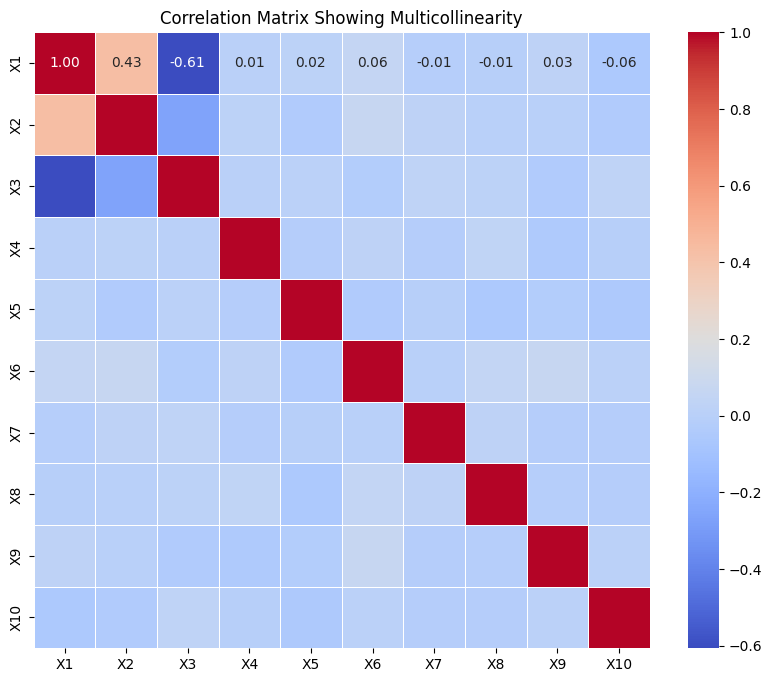

In [51]:
# Set up the matplotlib figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Show the plot
ax.set_title("Correlation Matrix Showing Multicollinearity")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    ax=ax,
)
plt.savefig("/root/outputs/correlation.png")